- 시계열 분석
    - 시간(time)의 흐름(step)에 따른 데이터들이 가지고 있는 특징(패턴)을 찾는 분석
    - 독립변수(X)는 시간이 되며, 종속변수(y)는 데이터가 됨
    - 회귀모델과 유사한 시각화(선형)를 통해 확인함
    - 시간의 흐름에 따른 향수 데이터를 확인하기 위한 예측 방법
    - 사용되는 분석 방법은 다양하며, 이중 ARIMA 모델이 가장 많이 사용됨

### 사용할 라이브러리

In [1]:
### 날짜 관련
import datetime

### 시각화
import matplotlib.pyplot as plt

### 한글처리
plt.rc("font", family = "Malgun Gothic")

### 마이너스기호 처리
plt.rcParams["axes.unicode_minus"] = False

### 데이터 수집

- 사용할 데이터셋
    - 증권사 : yahoo finance(야후 증권, 이외 다양한 증권사에서 제공하는 데이터로 사용 가능)
    - 수집기간 : 2012년 10월 31일 ~ 2022년 10월 31일까지 (10년간 데이터 수집)
    - 수집증권 : 구글 주식 수집
    - 수집증권 종목명 : GOOG
    - 데이터 제공 증권사에서 제공하는 데이터셋 라이브라리 : yfinance
        - 설치 필요 : pip install yfinance

In [2]:
### 야후 증권 데이터셋 제공 라이브러리
import yfinance as yf

In [3]:
### 10년치 데이터 수집을 위한 기간 설정
# - 날짜 타입의 년월일시분초 타입의 데이터로 기간을 생성해야 함
start = datetime.datetime(2012, 10, 31, 0, 0, 0)
end = datetime.datetime(2022, 10, 31, 0, 0, 0)

start, end

(datetime.datetime(2012, 10, 31, 0, 0), datetime.datetime(2022, 10, 31, 0, 0))

In [4]:
### 데이터 수집하기
# - start: 시작기간
# - end: 종료기간
# - auto_adjust=False: 조정하지 않은 실거래가(실제 거래 가격) 제공
goog_data = yf.download("GOOG", start=start, end=end, auto_adjust=False)
print(len(goog_data))
goog_data

[*********************100%***********************]  1 of 1 completed

2517


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-10-31,16.843866,16.943991,16.961424,16.811985,16.933031,61710442
2012-11-01,17.024363,17.125559,17.208000,16.904636,16.924065,82311371
2012-11-02,17.032534,17.133778,17.323816,17.120081,17.304888,93324497
2012-11-05,16.909727,17.010241,17.107376,16.825932,17.048597,65681270
2012-11-06,16.879025,16.979357,17.098412,16.875496,17.073006,63549309
...,...,...,...,...,...,...
2022-10-24,102.361549,102.970001,103.099998,100.300003,102.089996,24680800
2022-10-25,104.309967,104.930000,105.099998,103.019997,103.300003,29910200


In [5]:
### 데이터 정보 확인
goog_data.info()


# - Open     : 시작가
# - High     : 상한가
# - Low      : 하한가
# - Close    : 종가
# - Adj Close: 수정종가(분할, 배당, 배분, 신주 등이 발행한 경우 조정이 이루어진 값)
# - Volumn   : 거래량

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-31 to 2022-10-28
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  2517 non-null   float64
 1   (Close, GOOG)      2517 non-null   float64
 2   (High, GOOG)       2517 non-null   float64
 3   (Low, GOOG)        2517 non-null   float64
 4   (Open, GOOG)       2517 non-null   float64
 5   (Volume, GOOG)     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


### 컬럼명 변경하기

In [6]:
### 컬럼명 확인하기
# - 컬럼명만 추출
goog_data.columns

# MultiIndex
# - 복합 컬럼명을 멀티 인덱스라고 함
# - 하나의 컬럼명이 두 개 이상
# - 앞쪽 컬럼명만 사용할 예정

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [7]:
### 컬럼명 변경
# - columns 속성 중에 get_level_values() 함수를 이용
#   -> 멀티 인덱스의 0번째 값만 추출 가능

goog_data.columns.get_level_values(level=0)
# goog_data.columns.get_level_values(0)

goog_data.columns = goog_data.columns.get_level_values(level=0)
goog_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-10-31,16.843866,16.943991,16.961424,16.811985,16.933031,61710442
2012-11-01,17.024363,17.125559,17.208000,16.904636,16.924065,82311371
2012-11-02,17.032534,17.133778,17.323816,17.120081,17.304888,93324497
2012-11-05,16.909727,17.010241,17.107376,16.825932,17.048597,65681270
2012-11-06,16.879025,16.979357,17.098412,16.875496,17.073006,63549309


### 시계열 분석에 사용할 데이터 추출하기

In [8]:
### [Adj Close(수정종가)] 데이터 별도로 추출하기
data = goog_data["Adj Close"]
data

Date
2012-10-31     16.843866
2012-11-01     17.024363
2012-11-02     17.032534
2012-11-05     16.909727
2012-11-06     16.879025
                 ...    
2022-10-24    102.361549
2022-10-25    104.309967
2022-10-26     94.259712
2022-10-27     92.052826
2022-10-28     96.009308
Name: Adj Close, Length: 2517, dtype: float64

### 주식의 흐름(롤링-rolling) 확인

- 주식 흐름
    - 주식 데이터는 흐름 또는 이동 변화로 확인됨
    - 주식의 흐름을 롤링(rolling)이라고 칭함
    - 주식의 흐름을 확인하기 위해서 필요한 데이터
        - 이동평균(rolling mean) : 주식 가격의 흐름을 유연하게 보기 위해 사용
        - 이동 표준편차(rolling std) : 변동성의 흐름을 보기 위하여 사용
    

In [9]:
### 50일치에 대한 주식 흐름(이동 흐름) 확인하기
# - 전체 년도 각각에 대한 50일치에 대한 이동평균과 이동표준편차 확인

### 50일 기간 설정
interval = 50

### 이동평균(rolling mean) 계산
rolmean = data.rolling(interval).mean()

### 이동표준편차(rolling std) 계산
rolstd = data.rolling(interval).std()

rolmean, rolstd

(Date
 2012-10-31           NaN
 2012-11-01           NaN
 2012-11-02           NaN
 2012-11-05           NaN
 2012-11-06           NaN
                  ...    
 2022-10-24    105.354556
 2022-10-25    104.997678
 2022-10-26    104.447150
 2022-10-27    103.896026
 2022-10-28    103.413296
 Name: Adj Close, Length: 2517, dtype: float64,
 Date
 2012-10-31         NaN
 2012-11-01         NaN
 2012-11-02         NaN
 2012-11-05         NaN
 2012-11-06         NaN
                 ...   
 2022-10-24    7.394393
 2022-10-25    6.986402
 2022-10-26    6.715775
 2022-10-27    6.575356
 2022-10-28    6.235223
 Name: Adj Close, Length: 2517, dtype: float64)

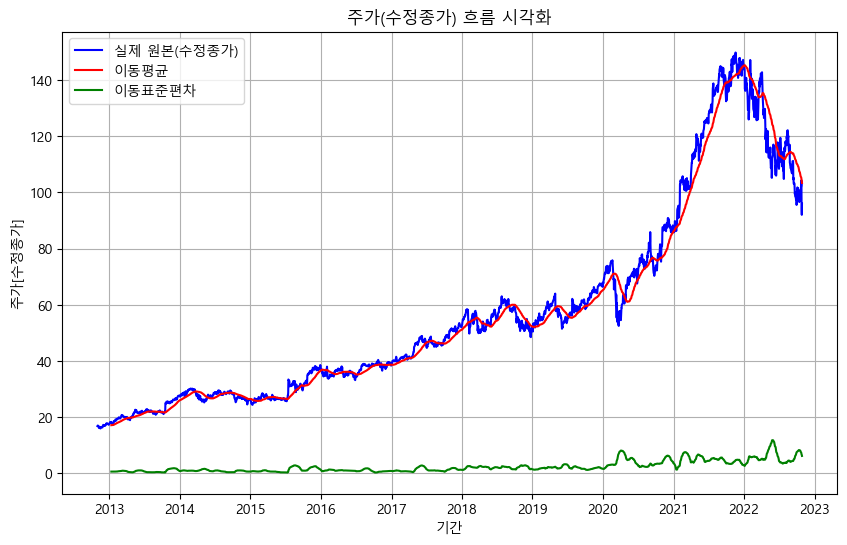

In [10]:
### 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.title("주가(수정종가) 흐름 시각화")

### 실제 주식 가격
plt.plot(data, color="blue", label="실제 원본(수정종가)")

### 이동 평균 그리기
plt.plot(rolmean, color="red", label="이동평균")

### 이동 표준편차 그리기
plt.plot(rolstd, color="green", label="이동표준편차")

plt.xlabel("기간")
plt.ylabel("주가[수정종가]")

plt.legend()
plt.grid()
plt.show()

### 데이터 스케일링 전처리

- 시계열 분석을 위한 데이터 전처리
    - 평균이 일정하지 않고 오르락, 내리락하는 불규칙 형태를 "비정상성" 이라고 칭함
    - 불규칙한 비정상성 데이터를 불규칙 하지 않도록 처리하는 방법. 즉 데이터 스케일리 처리해야함
    - 불규칙하지 않은 형태를 "정상정" 이라고 함
    - 비정상성을 정상성으로 만들기 위해서는 "차수(d)라는 개념이 적용됨(이후 설명 예정)
    - 정상성을 데이터 스케일링이라고 생각하면 됨

### 시계열 데이터 분석 모델 -> ARIMA 모델 사용

- 시계열 분석 ARIMA 모델
    - 오랜 동안 사용되어온 통계학적 모델
    - 시계열 분석에서 주로 사용되는 모델
    - "시계열분석"은 일반적으로 [시간을 독립변수(X)]로 사용함
        - 이외 데이터들을 [종속변수[y]]로 사용하여 예측하는 분석 방법
 
- ARIMA(Autoregressive Integrated Moving Average)
    * 현 시점의 데이터를 이용해서
        - 앞으로 어떤 패턴의 시각화로 그려질지를 예측하는 분석기법
    * AR(Autoregressive) : "자기상관" 이라고 함
        - 이전의 값이 이후의 값에 어떠한 영향을 미치고 있는지에 대한 "관계성"을 나타냄
    * MA(Moving Average) : "이동평균" 이라고 함
        - 특정 변수의 평균값이 지속적으로 증가하거나 감소하는 추이를 나타냄
    * AR(자기상관)과 MA(이동평균)을 통합(Integrated)한 모델을 ARIMA 모델이라고 함


- 분석 방법
    - 시계열 분석 시에는 비정상성을 정상성(데이터스케일링)으로 만들어서 분석을 진행
        - (기존의 데이터 스케일링 처리와 동일한 개념으로 사용됩니다.)
    - 정상성을 만들기 위해서 차수(d)라는 개념이 적용됩니다.
 
- 정상성(stationary)과 비정상성(Non-stationary)
    * 정상성
        - 평균과 분산(오르락 내리락)이 일정한 형태
        - 평균이 일정하고, 분산(오르락 내리락)하는 불규칙 형태가 없는 형태를 의미함
 
    * 비정상성
        - 평균과 분산이 일정하지 않은 형태(선의 형태가 급격히 오르락 내리락하는 형태)
        - 시간에 따라 평균 수준이 다르거나 특정한 패턴(Trend)이나 계절성(Sessonality)에 영향을 받는 경우 비정상 형태가 나타남
    - 예시 : 겨울에 난방비 증가, 여름에 아이스크림 판매량 증가


* 비정상성을 정상성으로 만드는 이유
    - 예측범위를 일정하게 줄이고, 성능 개선을 위해서
    - 기존의 데이터스케일링(정규화-표준화) 개념이 적용됨
 
* 비정상성을 정상성으로 변환하는 방법들
    - 평균의 정상화를 위한 "차분" 사용(주로 사용되는 방식)
    - 분산의 안정화를 위한 로그 변환 사용
    - 제곱/제곱근 변환 사용
    - 이외 등등 방법들
 
* 차분이란
    - 비정상성을 정상성으로 만들기 위한 방법으로
    - 관측데이터들의 차이를 계산하여 사용하게됨

### 시계열 데이터 정상성 확인하기 -> ADF 테스트

- ADF 테스트(Augmented Dickey-Fuller Test)>
    - 시계열 데이터의 정상성 여부를 통계적인 정량 방법으로 검증하는 방법
    - 귀무가설과 대립가설에 따라 결정됨
        * 귀무가설 : 기존의 연구이론
        * 대립가설 : 신규 연구이론(귀무가설에 반하는 연구)->정상성이 있는 경우 진행
    - 귀무가설과 대립가설의 보편적 기준 : p-value < 0.05 (유의미성 여부에 따라 결정됨)
        * p-value < 0.05가 참이면 : 귀무가설 기각, 대립가설 채택 (유의미함, 정상성)
        * p-value < 0.05가 거짓이면 : 귀무가설 채택, 대립가설 기각 (유의미하지 않음, 비정상성)
  
    - ADF 테스트는 정상성과 비정상성 데이터 형태를 구분하는 용도로 사용됨
        - (비정상성인 경우 -> 정상성으로 만들기 위한 처리를 수행 후 시계열분석을 진행하게됨)
    - ADF 테스트 라이브러리
        * 패키지 : statsmodels
        * 라이브러리 : adfuller
        * 설치 필요 : pip install statsmodels

In [11]:
### ADF 라이브러리 정의
from statsmodels.tsa.stattools import adfuller

In [12]:
### 수정종가 데이터 확인하기
data.values

array([16.84386635, 17.02436256, 17.03253365, ..., 94.25971222,
       92.05282593, 96.00930786])

In [13]:
### ADF 테스트에 사용할 데이터 : 수정종가 데이터, 인덱스는 Date 날짜
# - 데이터만 추출하여 사용 : 1차원 데이터(수정종가)
# - 수정종가 데이터를 이용하여 ADF 테스트 하기
# - 수정종가 데이터가 정상성인지 판단하기 위해서
result = adfuller(data.values)
result

(-0.7728514488114453,
 0.8269669796088172,
 24,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8093.878302978805)

- 출력 결과 값의 의미>
    * 첫번째 값(-0.772) : 테스트 통계량(Test Statistic)을 의미함
        - 데이터가 정상적인지를 테스트하기 위해 계산된 값을 의미함
        - 테스트 통계량이 작은 "음수 일수록 귀무 가설을 기각할 가능성이 높아짐"
 
    * 두번째 값(0.827) : p-value를 의미함
        - 기존의 가설(귀무가설)을 기각할 수 있는지의 여부를 나타내는 지표
        - p-value < 0.05 보다 작으면 귀무가설 기각(유의미함)
            -  ***이 경우 정상성이라고 결론 내릴 수 있음***
    - 0.827의 결과는 유의미 하지 않기 때문에 수정종가 데이터는 비정상성일 가능성이 높음
 
    * 세번째 값(24) : 사용된 지연 수(Number of Lags Used)를 의미함
        - ADF 테스트를 수행할 때 사용된 지연 차수(lags)의 값
        - 지연 차수 : 과거의 몇 시점까지의 데이터를, 현재 시점의 데이터와 비교하여 테스트 할지 결정
        - ADF 테스의 결과 24개의 지연된 데이터 포인트를 사용하여 수행했다는 의미임
            - 즉, 과거의 24개 시점까지의 데이터를 현재 시점의 데이터와 비교 했다는 의미임
 
    * 네번째 값(2492) : 관측값의 수(Number of Observations Used)를 의미함
        - ADF 테스트 시에 총 2492개의 데이터 포인트가 사용되었다는 의미
 
    * 다섯번째 값(딕셔너리) : 임계값(critical values)을 의미함
        - 1%, 5%, 10% 각각의 값들을 유의수준에서의 임계값 이라고 칭합니다.
        - 첫번째 값(테스트 통계량)과 임계값 각각과 비교해서, 임계값보다 테스트 통계량 값이 작으면 "정상성" 데이터, 크면 "비정성상" 이라고 판단
        - 첫번째 테스트 통계량의 값이 임계값모두 크기 때문에 "비정상성" 이라고 판담함
 
    * 여섯번째 값(8117) : 최대화된 정보기준(Akaike Information Criterion, AIC) 의미함
        - 모델의 적합도를 평가하는 데 사용함
        - AIC 값이 작을 수록 -> 더 적합한 모델로 간주 -> 이 값을 이용해서 모델 선택에 사용됨(ARIMA 모델)
     
- 결론
    - p-value < 0.05를 만족하지 않기 때문에 수정종가 데이터는 "비정상성" 데이터임
    - 즉, 시간의 흐름에 따라 평균이나 분산이 변하는 데이터임

In [14]:
### ADF 테스트 결과에서 p-value 값 추출하여 정상성(유의미성) 여부 확인하기
print(f"p-value < 0.05 : {result[1]} < 0.05")

### p-value < 0.05를 만족하지 않으므로 비정상성 데이터임
# - 비정상성 데이터인 경우 -> 정상성으로 만들기 위한 데이터 스케일링 처리를 수행해야함

p-value < 0.05 : 0.8269669796088172 < 0.05


### 정상성 처리를 위한 데이터 스케일링 처리하기(차분 계산 방법 적용)

In [15]:
### 차분 계산
# - 1차분을 "1d"라고 표현함
# - 사용함수 : diff()
# - 차분을 계산하면, 최초 또는 차분의 이동거리에 따라서 NaN이 발생한
#   -> NaN은 제거후 사용됨

# 1차분 계산
dff1 = data.diff()
dff1

Date
2012-10-31          NaN
2012-11-01     0.180496
2012-11-02     0.008171
2012-11-05    -0.122807
2012-11-06    -0.030703
                ...    
2022-10-24     1.481194
2022-10-25     1.948418
2022-10-26   -10.050255
2022-10-27    -2.206886
2022-10-28     3.956482
Name: Adj Close, Length: 2517, dtype: float64

In [16]:
### NaN 데이터 모두 제거하기
dff1 = data.diff().dropna()
dff1

Date
2012-11-01     0.180496
2012-11-02     0.008171
2012-11-05    -0.122807
2012-11-06    -0.030703
2012-11-07    -0.361488
                ...    
2022-10-24     1.481194
2022-10-25     1.948418
2022-10-26   -10.050255
2022-10-27    -2.206886
2022-10-28     3.956482
Name: Adj Close, Length: 2516, dtype: float64

<Axes: xlabel='Date'>

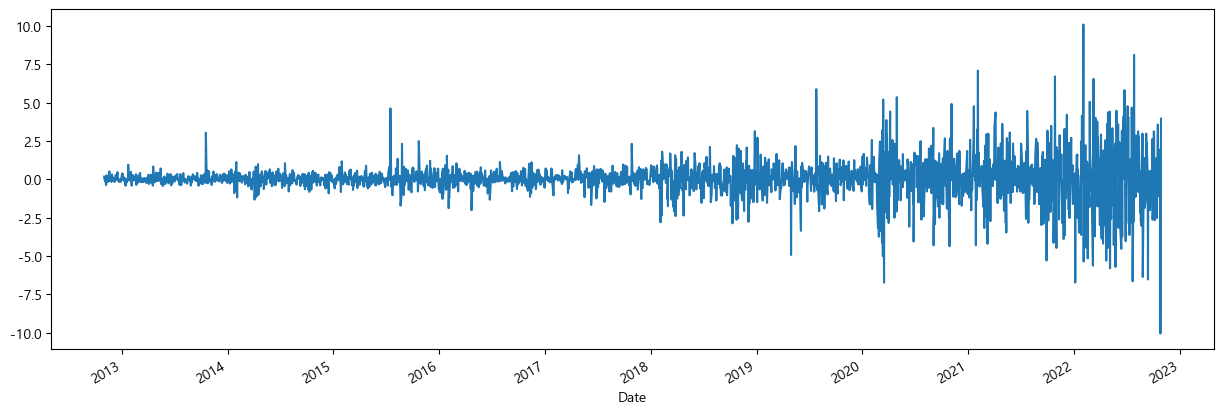

In [17]:
### 1차분 결과 데이터를 시각화 하기
dff1.plot(figsize=(15, 5))

In [18]:
### 1차분 계산 결과 데이터를 이용하여 -> 다시한번 ADF 테스트를 통해 정상성 여부 확인하기
result = adfuller(dff1.values)
print(result)
print(f"p-value : {result[1] : .3f}")

### 1차분 수행 후 수정종가 데이터는 p-value < 0.05를 만족하는 정상성 데이터로
# - 시계열 분석에 사용 가능한 데이터임

(-10.59271515988692, 6.465820092681959e-19, 23, 2492, {'1%': -3.432976825339513, '5%': -2.862700515844509, '10%': -2.5673877878037974}, 8090.227667513332)
p-value :  0.000


### ARIMA 모델 훈련을 위한 하이퍼파라메터 찾기

- ARIMA 모델 수행 방법
- 1. 하이퍼파라메터 찾기
    * ARIMA 모델에서 사용되는 중요한 3개의 하이퍼파라메터
        - p(자기회귀모형, AR), d(차분), q(이동평균모형, MA)값을 결정해야 함
        - p값은 찾아야 함
        - q값은, p-q의 값이 0일 때의 q값을 찾으면 됨
            - 즉, p값을 알면, q값을 알 수 있음
     
   * p, d, q값을 결정하는 방법
        - ACF(자기상관) plot과 PACF(부분자기상관) plot을 통해 모수(하이퍼파라메터)를 결정 할 수 있음
        - 현재값이 과거값과 어떤 관계가 있는지를 보여주는 그래프로 확인
   
    - pmdarima 라이브러리의 ndiffs, auto_arima 함수를 사용하여 모수(하이퍼파라메터)를 결정할 수 있음
        - 대표적으로 auto_arima 함수를 사용
            - GridSearchCV와 유사함, 자동으로 최적의 모델을 만들어냄
   
- 2. 찾은 하이퍼파라메터를 이용해서 모델 훈련
- 3. 시계열 예측
- 4. 시각화

### (방법1) ACF 및 PACF plot을 통한 하이퍼파라메터 결정

In [19]:
### 사용 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

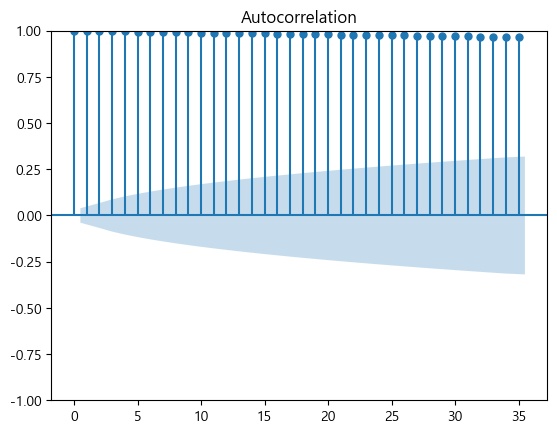

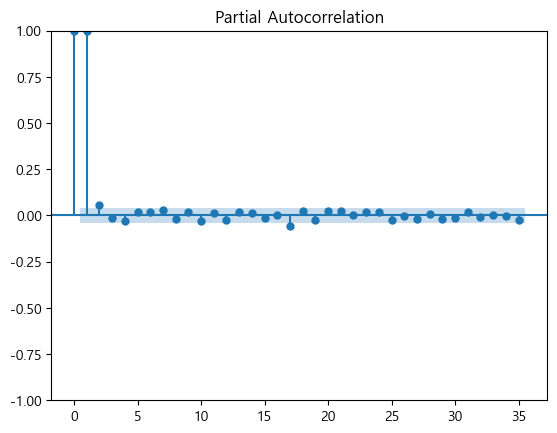

In [20]:
### 수정종가 원본을 이용하여 ACF 및 PACF 시각화하기
plot_acf(data)
plot_pacf(data)
plt.show()

- 해석 방법
    - x축을 lag
    - y축은 지표값
    - 파랑색 영역은 "신뢰구간"
        - 95% 신뢰 구간을 의미함


* ACF(자기상관) plot
    - ACF는 시계열 데이터가 얼마나 자기상관(자기 자신과 다른 데이터가 얼마나 연관이 있는지)를 보여주는 시각화
    - ACF plot에서 막대그프가 "천천히 감소"되는 것으로 보임
    - 이는 주식 데이터가 주기에 따라서 일정하지 않음을 의미함(비정상성)으로 판단함
    - 시계열 데이터에서 과거 값과 현재 값 사이의 상관관계를 측정
    - ACF는 MA(q) 모델의 적절한 q값을 선택할 때 사용
    - ACF 그래프에서 유의미한 지점까지의 lag 수가 q가 됨
    - (해석 예시)첫 1~2개의 막대가 파란 영역을 벗어나면 → MA(q)에서 q=1 또는 q=2 후보가 됨


* PACF(부분자기상관) plot
    - PACF는 중간에 있는 다른 시점들의 영향을 제거한 후에 계산된 상관 관계를 나타냄
    - 첫값을 제외한 2번째 막대그래프가 파랑색 영역에 들어가지 않고 끊기는 것으로 보임
    - 세번째 값부터 파랑색 영역에 포함되어 있음
    - 첫번째 막대그래프를 제외하고 2번째 막대그래프에 대한 1차분 처리가 필요함
    - 현재 시점과 특정 시점(lag) 사이의 순수한 상관관계를 측정 (중간 값들의 영향 제거)
    - PACF는 AR(p) 모델의 적절한 p값을 선택할 때 사용
    - PACF 그래프에서 유의미한 지점까지의 lag 수가 p가 됨
    - (해석 예시)첫 번째 1~2개의 막대가 파란 영역을 벗어나면 → AR(p)에서 p=1 또는 p=2 후보가 됨


* ACF 및 PACF 공통사항
    - x축 0번째의 값은 항상 1임
    - 즉, 0번째의 값은 -> 자기 자신과의 상관관계를 나타내는 값으로 -> 항상 1
    - 따라서, 실제로 지표 확인 시에는 0번짹 값은 제외하고 해석
        - 즉, 모델의 p, q 추정에는 영향을 주지 않기에 제외하고 해석함


* 데이터가 신뢰그간을 벗어나는 값들이 존재함
    - 따라서 비정상성 데이터로 판단되기에, 정상성 데이터 처리를 위한 p, q 값 정의를 통해 모델 훈련시 하이퍼파라메터로 사용해야함

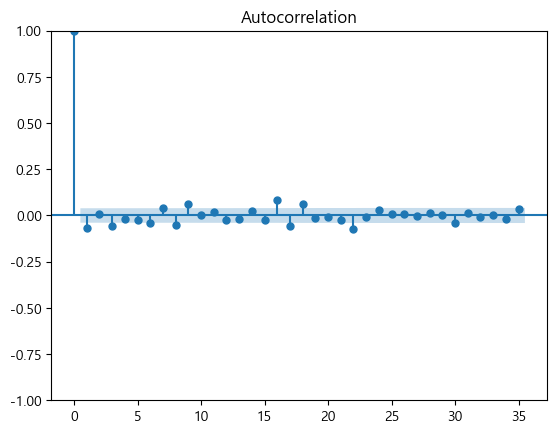

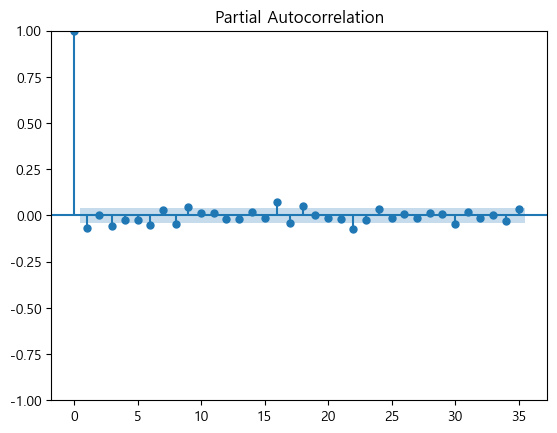

In [21]:
### 수정종가 1차분 계산된 정상성 데이터로 ACF 및 PACF 시각화하기
# - 수정종가 1차분 데이터 : dff1
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

### 1차분 데이터를 이용한 ACR(q) 지표와 PACF(p) 지표는
# - 0번째를 제외한 1번째가 벗어 났기에
# - p=1, d=1, q=1로 하이퍼파라메터를 정의할 수 있음
# - 다만, d의 값의 경우 1차분만 했으며, 2차분 이후 확인 작업을 통해
#         유의미 범위에 포함되는 비율이 높다면, d는 2차분을 사용하게 됨
#         -> 2차분 후의 p와 q의 값도 달라 질 수 있음

### (방법2) pmdarima 라이브러리의 ndiffs, auto_arima 함수를 사용

In [22]:
### ndiffs(Number of Differences) 함수 사용
# - 차분 차수를 "결정"하는 함수
# - pmdarima 라이브러리 사용
# -> 설치 필요 : pip install pmdarima

import pmdarima as pm
from pmdarima.arima import ndiffs

In [23]:
### 사용중인 데이터
data

Date
2012-10-31     16.843866
2012-11-01     17.024363
2012-11-02     17.032534
2012-11-05     16.909727
2012-11-06     16.879025
                 ...    
2022-10-24    102.361549
2022-10-25    104.309967
2022-10-26     94.259712
2022-10-27     92.052826
2022-10-28     96.009308
Name: Adj Close, Length: 2517, dtype: float64

In [24]:
### 차분 차수 결정하기
# - 시계열 데이터를 정상성
#   -> 몇번의 차분(differencing)이 필요한지를 결정하는 함수

# - data : 시간 단위 수정종가 데이터
# - alpha : 차분 횟수를 결정하는데 사용할 p-value(유의수준) 기준값
# - test : 차분 횟수를 결정하는데 사용할 테스트 방법 지정(일반적으로 adf 사용)
# - max_d : 최대 차분 횟수를 제한(최대 차분 횟수 내에서 가장 적절한 차수 결정)

### 결정된 차분 차수의 "d값"은 -> auto_arima 수행 시 사용됨
n_diffs = ndiffs(data, alpha=0.05, test="adf", max_d=6)
print(f"결정된 차분(d)의 차수 : {n_diffs}d")

결정된 차분(d)의 차수 : 1d


In [25]:
### auto_arima 함수 사용 : 최적의 p, q를 찾아서 최적의 모델을 반환해줌

model = pm.auto_arima(
    # 종속변수 : 데이터 원본(수정종가)
    y = data,
    # 차분의 차수 : 지정하지 않으면 기본값 None (훈련 시간이 매우 길어짐)
    #             : 일반적으로 ndiffs() 함수를 통해 찾은 값을 사용하면 됨
    d = 1,
    
    # p(AR)를 찾기 위한 범위를 지정(start_p 에서 max_p까지의 값 범위 내 찾기)
    # - start_p의 기본값은 2, max_p의 기본값은 5
    start_p = 0, max_p = 3,
    
    # q(MA)를 찾기 위한 범위를 지정(start_q 에서 max_q까지의 값 범위 내 찾기)
    # - start_q의 기본값은 2, max_q의 기본값은 5
    start_q = 0, max_q = 3,
    
    # m : 계절적(seasonal) 특성에 따라 사용되는 값(기본값은 1)
    # - m=1 : 계절적 특성이 없을 때(seasonal=False) 1을 사용함
    
    # <계절적 특성이 있을 때>
    # - m=3 : 데이터가 월 단위로 나와있고 매 3개월마다 반복되는 계절성이 있는 경우 사용
    # - m=4 : 데이터가 분기 단위로 나와있고, 분기별 데이터에서 연간(4분기) 계절성이 있는 경우 사용
    # - m=12 : 데이터가 월 단위로 나와있고 월별 데이터에서 연간(12개월) 계절성이 있는 경우 사용
    # - m=52 : 데이터가 주 단위로 나와있고 주별 데이터에서 연간(52주) 계절성이 있는 경우 사용
    m = 1,
    
    # seasonal : 계절성 특성 여부 설정(기본값은 False)
    # - seasonal=False : 계절성 특성을 적용 안함(m=1로 설정하게 됨)
    # - seasonal=True : 계절성 특성을 적용한 경우(m의 값은 데이터 성격에 맞게 정의)
    # 계절성을 적용할지 말지는 auto_arima 모델에 False인 경우와 True인 경우를 각각 수행
    #   -> best_model의 AIC의 값이 작은 best_model을 선택하면 됨 
    seasonal = False,
    
    # stepwise : 최적의 모수를 찾기 위한 알고리즘을 사용할지 여부(기본값은 True)
    # - stepwise=True : 단계적으로 최적의 ARIMA 모델을 찾는 방법을 수행
    #                 : (p, d, q)에 대한 값들의 조합을 하나씩 바꿔가면서 AIC(or BIC)가 가장 낮은 시점의 모델을 탐색
    #                 : AIC가 낮아지면 그 방향으로 계속 움직이면서 성능 개선
    #                 : 더 이상 개선되지 않으면 훈련 종료
    #                 : (예시) 계단을 오르듯이 한 발씩 오르면서 최적값을 찾는다는 의미
    # - stepwise=False : 가능한 조합의 모든 (p, d, q)를 모두 탐색함
    #                  : 좋아지는 방향을 찾기 보다는 (p, d, q)의 모든 조합을 각각 수행하여 결정
    #                  : (예시) p=0~5, q=0~5 일때, 총 36개 이상의 조합을 모두 각각 훈련하는 방법
    #                  : 정확도는 True보다 다소 높을 수 있으나 매우 느리고 계산량이 많아짐
    stepwise = True,
    
    # 자동 모형 선택 과정의 출력을 보여줄지 여부 설정(기본값은 False)
    # - auto_arima가 어떤 (p, d, q) 조합을 시도하고 있는지 콘솔에 하나하나 출력해줌 
    trace = True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8201.734, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8192.002, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8192.037, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8201.369, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8193.977, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8193.274, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8195.998, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8191.864, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=8193.826, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8193.067, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8191.916, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8194.841, Time=0.28 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.737 seconds


- auto_arima 함수가 모델 선정하는 방식
    - 최적의 모델 선정 기준 : AIC의 값이 가장 낮을 때의 ARIMA(p, d, q)가 선택됨
    - AIC(Akaike Information Criterion)란
        - 모델의 적합도(설명력)와 복잡도 사이의 균형을 평가하는 지표
        - 최적의 ARIMA 모델을 선정하는 지표로 사용됨
        - 모델의 설명력(결정력)이 좋을 수록 AIC 값이 작아지고(좋음), 모델이 복잡해 질수록 AIC 값이 커짐(나쁨)
    - Time : 해당 모델 학습에 걸린 시간
    - intercept(절편)
        - 내부적으로 intercept(절편)을 포함 및 제외하여 모델이 모두 실험함
        - 출력 내용 중 intercept 부분은 (절편)을 포함한 AIC 결과라는 의미임
    - Best Model : 최종 선택된 최적의 모델(AIC 기준 = 가장 낮은 값) => ARIMA(1, 1, 0)

In [26]:
### 모델 확인
model

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

- Best Model을 이용해서 실제값과 예측값과의 차이(잔차) 확인하기 위한 잔차 검정(평가)을 진행
    - 잔차 : 실제값과 예측값과의 차이
    - 잔차검정 : 정상성, 정규성 등을 만족하는 모델인지 확인하는 검정(평가)
    - 검정(평가) 함수 : summary(), plot_dignstics()

### 검정(평가) 함수 : summary()

- 결과 항목중 좋고 나쁨의 기준
    * 로그 우도 (Log Likelihood)
        - 로그 우도는 모델이 데이터를 얼마나 잘 설명하는지를 나타냄
        - "우도"라는 용어 대신 "가능도"라고 부르기도함 (일반적으로 "우도"라고 칭함)
        - 여러 모델들 중에 절대값이 0에 가까울 수록 모델이 데이터를 잘 설명함을 의미함(좋음)
        - 로그 우도는 모델 간의 상대 비교 지표이지, 단일 값에 대한 절대적 해석 기준은 아님
        - 즉, 여러 모델간에 비교 시 어느 값이 더 0에 가까운지를 비교하는 지표일 뿐임
    - 단일 값들은 모두 매우 큰 값들이 나옴


    * AIC, BIC, HQIC
        - AIC (Akaike Information Criterion) : 빠르게 최적 모델 선택하고 싶을 때 사용(가장 많이 사용됨)
        - BIC (Bayesian Information Criterion) : 샘플 수가 많고 과적합이 걱정될 때 사용됨
        - HQIC (Hannan-Quinn IC) : 이론적 정밀한 선택이 필요할 때 사용됨


    - 위 세개 모두 모형 적합도와 복잡도 간의 균형을 측정하는 지표
        - 좋은 모델을 고르기 위한 점수라고 이해하면 됨
    - 세가지 지표값들은 모두 낮을 수록 좋음
    - 모델간에 비교시 사용하는 데이터로, best model을 추출하여 사용하였기에 고려하지 않아도 됨
    - 위 세개 지표의 차이점은 "모델 복잡도"의 패널티값(가중치값)의 차이만 있음


    * P > 값
        - 유의미 계수 값이 통계적으로 유의한지를 나타냄
        - 0.05 이하일 때 유의미함(p-value를 의미함)
        - 해당 계수가 의미 있는 설명변수임

    * Ljung-Box 검사
        - 잔차의 자기상관성 검정
        - p-값이 높을 수록 잔차의 자기상관이 없음을 의미함
        - p-값 > 0.05이면 좋음
        - p-값은 Prob(Q)의 값으로 확인

    * Jarque-Bera 검사
        - 잔차 정규성 검정
        - p-값이 높을 수록 잔차가 정규분포에 가까움(좋음)
        - p-값 > 0.05이면 좋음
        - p-값은 Prob(JB)의 값으로 확인

    * Heteroskedasticity 검사
        - 이분산성 검정(H test 라고 칭함)
        - p-값이 높을 수록 이분산성이 없음
        - p-값 > 0.05이면 좋음
        - p-값은 Prob(H)의 값으로 확인
    
    * 왜도(Skew)와 척도(Kurtosis)
        - 잔차의 분포가 정규분포에 가까운지 판단할 때 사용
        - 왜도는 0에 가까울 수록, 첨도는 3에 가까울 수록 좋음(정규분포에 가까워짐)


- 성능평가 결론
    - 성능평가에 따른 모델의 좋고 나쁨은 보통 AIC의 값을 기준으로 함
    - 단일 모델로는 좋고 나쁨을 평가하기는 어려움
    - 여러 모델들 중 비교시에 AIC의 값이 낮을 수록 좋은 모델로 평가함
    - 단일 모델 하나인 경우에는 Auto-ARIMA 자체가 최적의 모델을 반환
        - 성능평가의 비교대상이 없으므로 무시해도 됨

In [27]:
### 모델 검정평가 : summary()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2517
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -4093.932
Date:                Tue, 17 Jun 2025   AIC                           8191.864
Time:                        13:47:41   BIC                           8203.524
Sample:                             0   HQIC                          8196.096
                               - 2517                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0677      0.011     -6.070      0.000      -0.090      -0.046
sigma2         1.5166      0.017     87.291      0.000       1.482       1.551
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10915.26
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              20.60   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 검정(평가) 함수 : plot_dignstics()

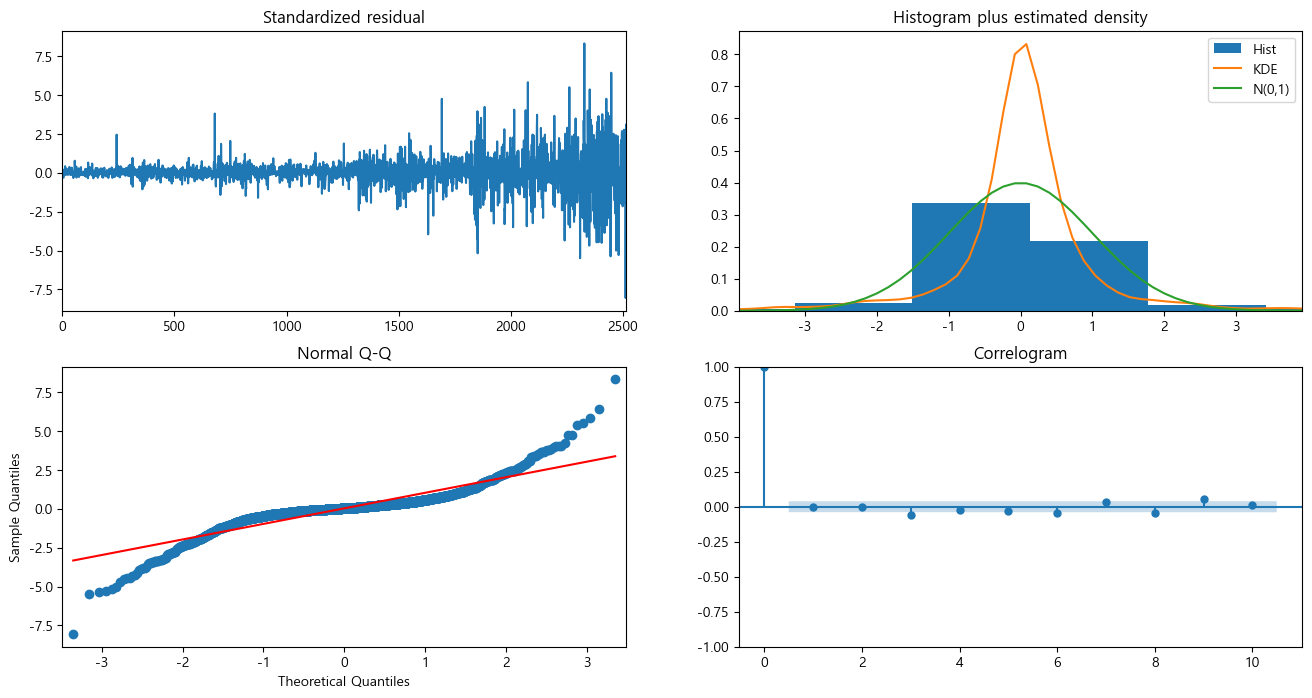

In [28]:
### 모델 시각화
model.plot_diagnostics(figsize=(16, 8))
plt.show()

- Standardized residual ; 표준 잔차
    - 잔차(y축)가 시계열 데이터의 시간축(x축)에 따라 어떻게 분포하는지를 나타냄
    - 표준화 잔차 시각화를 통해 잔차의 패턴, 추세, 변동성 등을 확인 할 수 있음
    - 이상적인 잔차의 범위 : y축의 잔차 분포가 대부분 -2에서 2사이에 위치하면 이상적이라고 표현함(이상적 모델)
        - -2 ~ +2 => 대부분의 정상 데이터가 위치하는 범위 (약 95%)
        - -3 ~ +3 => 거의 모든 정상 데이터가 위치 (약 99.7%)
        - ±2 또는 ±3을 벗어나면 => 모델이 해당 시점의 데이터를 잘 예측하지 못한다는 의미


- Histogram plus estimated density ; 히스토그램 및 추정 밀도(정규분포)
   - 잔차의 분포를 히스토그램(Hist)과 함께 커널밀도(KDE) 추정 곡선으로 나타냄
    - 히스토그램 그래프는 -> 실제 잔차의 분포(y축)가 정규 분포에서 얼마나 가까운지를 확인하는데 사용됨
    - 커널 밀도(KDE) 추정 곡선 -> 히스트그램의 분포를 부드럽게 연결한 곡선 -> 잔차가 어느 값에 집중되어 있는지를 시각적으로 쉽게 파악할 수 있음
    - 잔차가 정규 분포에 가까우면 -> 모델의 예측 오차가 잘 분포되어 있다는 의미임 -> 즉, 특정 패턴이나 편향이 없음을 나타냄


- Normal Q-Q ; 정규 Q-Q plot
    - 잔차의 정규성(정규 분포와의 일치 정도)를 나타내는 평가 도구
    - 실제 잔차의 분포(y축)와 이론적으로 기대되는 정규분포(x축)를 비교
    - x축은 이론적 분위수를 나타내며, y축은 실제 잔차의 분위수를 나타냄
    - 이상적인 형태 : 점들이 대각선에 가깝게 직선으로 배열되어 있으면 좋음
        - 대각선에서 크게 벗어난 점들이 많다면
            - 잔차가 정규분포를 따르지 않는다는 것을 의미함
            - 모델 성능이 좋지 않음을 나타냄(이상적이지 않은 모델)


- Correlogram ; 상관도 또는 ACF plot
    - ACF plot을 통해 잔차에 남아있는 자기상관이 있는지 확인할 수 있음
    - 자기 상관계수(y축)의 값이 시간흐름(x축)에 따른 상관성을 확인
    - 자기 상관이 없어야 좋으며, 자기상관계수(y축)의 값들이 95% 신뢰구간에 속하면 좋음
        - 95%신뢰구간 : p-value < 0.05를 의미함
    - 이상적인 형태
        - 대부분의 자기상관 계수(점, dot)들이 0에 가깝고
        - 신뢰구간(일반적으로 신뢰구간은 파랑색 위/아래 영역) 내에 있으면 좋음
        - 신뢰 구간을 벗어나거나,
        - 신뢰구간을 벗어나면서 주기적으로 오르락/내리락하는
        - 반복된 패턴이 보이면, 이 모델로는 모든 데이터의 패턴을 완벽하게 훈련하지 못할 수도 있음


### 훈련 및 테스트 데이터로 분리하여 훈련 및 테스트 진행

In [ ]:
### 훈련 : 테스트 = 9:1로 분류하여 auto_arima 함수로 최적의 모델 찾기
# - 분류 방법 : 연속형 시계열 데이터는 기존의 train_test_split 함수 사용 못함(랜덤으로 섞기 때문)
#             : 시계열 데이터의 앞쪽 90% 와 뒤쪽 10%의 비율로 분리하여 사용
# 훈련 데이터 변수명 : train_data
# 테스트 데이터 변수명 : test_data
train_data = data[ : int(len(data)*0.9)]
test_data = data[int(len(data)*0.9) : ]

train_data.shape, test_data.shape

((2265,), (252,))

In [30]:
### 1. 훈련 데이터로 auto_arima 훈련 시키기(계절성 미적용)
# - 변수명 : best_model_sFalse

best_model_sFalse = pm.auto_arima(
    y = train_data,
    # 차분의 차수 : 지정하지 않으면 기본값 None (훈련 시간이 매우 길어짐)
    #             : 일반적으로 ndiffs() 함수를 통해 찾은 값을 사용하면 됨
    d = 1,
    
    # p(AR)를 찾기 위한 범위를 지정(start_p 에서 max_p까지의 값 범위 내 찾기)
    # - start_p의 기본값은 2, max_p의 기본값은 5
    start_p = 0, max_p = 5,
    
    # q(MA)를 찾기 위한 범위를 지정(start_q 에서 max_q까지의 값 범위 내 찾기)
    # - start_q의 기본값은 2, max_q의 기본값은 5
    start_q = 0, max_q = 5,
    
    # m : 계절적(seasonal) 특성에 따라 사용되는 값(기본값은 1)
    # - m=1 : 계절적 특성이 없을 때(seasonal=False) 1을 사용함
    
    # <계절적 특성이 있을 때>
    # - m=3 : 데이터가 월 단위로 나와있고 매 3개월마다 반복되는 계절성이 있는 경우 사용
    # - m=4 : 데이터가 분기 단위로 나와있고, 분기별 데이터에서 연간(4분기) 계절성이 있는 경우 사용
    # - m=12 : 데이터가 월 단위로 나와있고 월별 데이터에서 연간(12개월) 계절성이 있는 경우 사용
    # - m=52 : 데이터가 주 단위로 나와있고 주별 데이터에서 연간(52주) 계절성이 있는 경우 사용
    m = 1,
    
    # seasonal : 계절성 특성 여부 설정(기본값은 False)
    # - seasonal=False : 계절성 특성을 적용 안함(m=1로 설정하게 됨)
    # - seasonal=True : 계절성 특성을 적용한 경우(m의 값은 데이터 성격에 맞게 정의)
    # 계절성을 적용할지 말지는 auto_arima 모델에 False인 경우와 True인 경우를 각각 수행
    #   -> best_model의 AIC의 값이 작은 best_model을 선택하면 됨 
    seasonal = False,
    
    # stepwise : 최적의 모수를 찾기 위한 알고리즘을 사용할지 여부(기본값은 True)
    # - stepwise=True : 단계적으로 최적의 ARIMA 모델을 찾는 방법을 수행
    #                 : (p, d, q)에 대한 값들의 조합을 하나씩 바꿔가면서 AIC(or BIC)가 가장 낮은 시점의 모델을 탐색
    #                 : AIC가 낮아지면 그 방향으로 계속 움직이면서 성능 개선
    #                 : 더 이상 개선되지 않으면 훈련 종료
    #                 : (예시) 계단을 오르듯이 한 발씩 오르면서 최적값을 찾는다는 의미
    # - stepwise=False : 가능한 조합의 모든 (p, d, q)를 모두 탐색함
    #                  : 좋아지는 방향을 찾기 보다는 (p, d, q)의 모든 조합을 각각 수행하여 결정
    #                  : (예시) p=0~5, q=0~5 일때, 총 36개 이상의 조합을 모두 각각 훈련하는 방법
    #                  : 정확도는 True보다 다소 높을 수 있으나 매우 느리고 계산량이 많아짐
    stepwise = True,
    
    # 자동 모형 선택 과정의 출력을 보여줄지 여부 설정(기본값은 False)
    # - auto_arima가 어떤 (p, d, q) 조합을 시도하고 있는지 콘솔에 하나하나 출력해줌 
    trace = True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6100.783, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6092.276, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6092.636, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6107.188, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6093.470, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6091.929, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6093.928, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6093.928, Time=0.76 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6093.969, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6093.668, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6099.179, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.167 seconds


In [31]:
### 2. 훈련 데이터로 auto_arima 훈련 시키기(계절성 적용)
# - 변수명 : best_model_sTrue
best_model_sTrue = pm.auto_arima(
    y = train_data,
    # 차분의 차수 : 지정하지 않으면 기본값 None (훈련 시간이 매우 길어짐)
    #             : 일반적으로 ndiffs() 함수를 통해 찾은 값을 사용하면 됨
    d = 1,
    
    # p(AR)를 찾기 위한 범위를 지정(start_p 에서 max_p까지의 값 범위 내 찾기)
    # - start_p의 기본값은 2, max_p의 기본값은 5
    start_p = 0, max_p = 5,
    
    # q(MA)를 찾기 위한 범위를 지정(start_q 에서 max_q까지의 값 범위 내 찾기)
    # - start_q의 기본값은 2, max_q의 기본값은 5
    start_q = 0, max_q = 5,
    
    # m : 계절적(seasonal) 특성에 따라 사용되는 값(기본값은 1)
    # - m=1 : 계절적 특성이 없을 때(seasonal=False) 1을 사용함
    
    # <계절적 특성이 있을 때>
    # - m=3 : 데이터가 월 단위로 나와있고 매 3개월마다 반복되는 계절성이 있는 경우 사용
    # - m=4 : 데이터가 분기 단위로 나와있고, 분기별 데이터에서 연간(4분기) 계절성이 있는 경우 사용
    # - m=12 : 데이터가 월 단위로 나와있고 월별 데이터에서 연간(12개월) 계절성이 있는 경우 사용
    # - m=52 : 데이터가 주 단위로 나와있고 주별 데이터에서 연간(52주) 계절성이 있는 경우 사용
    m = 3,
    
    # seasonal : 계절성 특성 여부 설정(기본값은 False)
    # - seasonal=False : 계절성 특성을 적용 안함(m=1로 설정하게 됨)
    # - seasonal=True : 계절성 특성을 적용한 경우(m의 값은 데이터 성격에 맞게 정의)
    # 계절성을 적용할지 말지는 auto_arima 모델에 False인 경우와 True인 경우를 각각 수행
    #   -> best_model의 AIC의 값이 작은 best_model을 선택하면 됨 
    seasonal = True,
    
    # stepwise : 최적의 모수를 찾기 위한 알고리즘을 사용할지 여부(기본값은 True)
    # - stepwise=True : 단계적으로 최적의 ARIMA 모델을 찾는 방법을 수행
    #                 : (p, d, q)에 대한 값들의 조합을 하나씩 바꿔가면서 AIC(or BIC)가 가장 낮은 시점의 모델을 탐색
    #                 : AIC가 낮아지면 그 방향으로 계속 움직이면서 성능 개선
    #                 : 더 이상 개선되지 않으면 훈련 종료
    #                 : (예시) 계단을 오르듯이 한 발씩 오르면서 최적값을 찾는다는 의미
    # - stepwise=False : 가능한 조합의 모든 (p, d, q)를 모두 탐색함
    #                  : 좋아지는 방향을 찾기 보다는 (p, d, q)의 모든 조합을 각각 수행하여 결정
    #                  : (예시) p=0~5, q=0~5 일때, 총 36개 이상의 조합을 모두 각각 훈련하는 방법
    #                  : 정확도는 True보다 다소 높을 수 있으나 매우 느리고 계산량이 많아짐
    stepwise = True,
    
    # 자동 모형 선택 과정의 출력을 보여줄지 여부 설정(기본값은 False)
    # - auto_arima가 어떤 (p, d, q) 조합을 시도하고 있는지 콘솔에 하나하나 출력해줌 
    trace = True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[3] intercept   : AIC=6098.090, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=6100.783, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=6088.994, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=6088.844, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=6107.188, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[3] intercept   : AIC=6092.636, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[3] intercept   : AIC=6090.216, Time=0.45 sec
 ARIMA(0,1,1)(0,0,2)[3] intercept   : AIC=6088.146, Time=0.29 sec
 ARIMA(0,1,1)(1,0,2)[3] intercept   : AIC=6085.528, Time=0.85 sec
 ARIMA(0,1,1)(2,0,2)[3] intercept   : AIC=6060.397, Time=2.34 sec
 ARIMA(0,1,1)(2,0,1)[3] intercept   : AIC=6083.474, Time=0.51 sec
 ARIMA(0,1,0)(2,0,2)[3] intercept   : AIC=6067.383, Time=1.90 sec
 ARIMA(1,1,1)(2,0,2)[3] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(0,1,2)(2,0,2)[3] intercept   : AIC=6062.018, Time=2.94 sec
 ARIMA(1,1,0)(2,0,2)[3] intercept   : 

In [32]:
### sFalse = ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6091.929, Time=0.56 sec
### sTrue  = ARIMA(1,1,1)(2,0,2)[3] intercept   : AIC=6059.654, Time=2.94 sec

### 해석
# - 계절성을 적용하지 않은 모델과 적용한 최적의 모델 중 AIC가 가장 작은 모델을 선정
# - 계절성을 적용한 최적의 모델이 예측력(결정력)이 좋은 모델로 판단됨

### 훈련모델을 이용한 계절성 여부에 따른 최적의 모델 성능 검정(평가)하기

In [33]:
### 계절성 미적용 : 검정(평가) 함수 : summary()
best_model_sFalse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3041.964
Date:                Tue, 17 Jun 2025   AIC                           6091.929
Time:                        13:48:09   BIC                           6114.828
Sample:                             0   HQIC                          6100.285
                               - 2265                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0846      0.028      3.000      0.003       0.029       0.140
ar.L1         -0.4906      0.106     -4.650      0.000      -0.697      -0.284
ma.L1          0.4247      0.108      3.915      0.000       0.212       0.637
sigma2         0.8602      0.010     82.185      0.000       0.840       0.881
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9707.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.78   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
### 계절성 적용 : 검정(평가) 함수 : summary()
best_model_sTrue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 2265
Model:             SARIMAX(1, 1, 0)x(2, 0, [1, 2], 3)   Log Likelihood               -3023.066
Date:                                Tue, 17 Jun 2025   AIC                           6060.132
Time:                                        13:48:09   BIC                           6100.206
Sample:                                             0   HQIC                          6074.754
                                               - 2265                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1878      0.061      3.074      0.002       0.068       0.307
ar.L1         -0.0656      0.012     -5.623      0.000      -0.088      -0.043
ar.S.L3       -1.1495      0.013    -91.214      0.000      -1.174      -1.125
ar.S.L6       -0.9630      0.012    -78.114      0.000      -0.987      -0.939
ma.S.L3        1.1640      0.015     76.364      0.000       1.134       1.194
ma.S.L6        0.9396      0.015     60.761      0.000       0.909       0.970
sigma2         0.8456      0.011     79.132      0.000       0.825       0.867
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9099.33
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.54   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

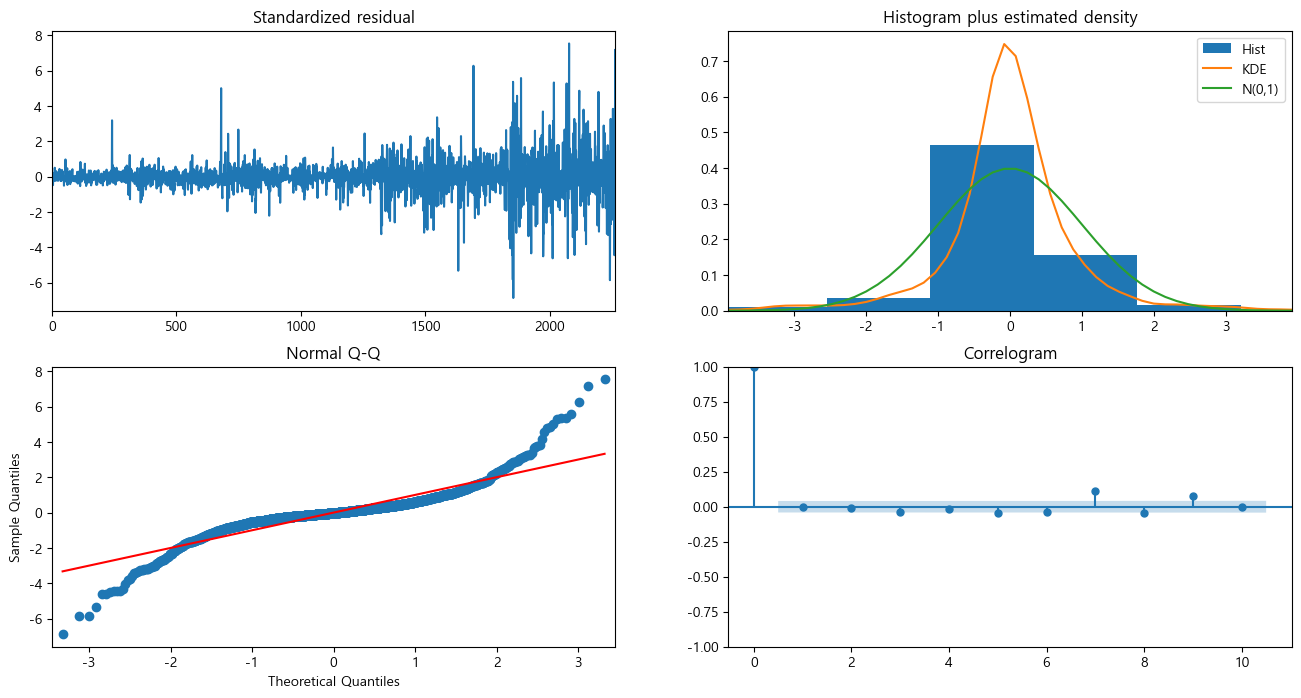

In [35]:
### 계절성 미적용 : 검정(평가) 함수 : plot_diagnostics()
best_model_sFalse.plot_diagnostics(figsize=(16, 8))
plt.show()

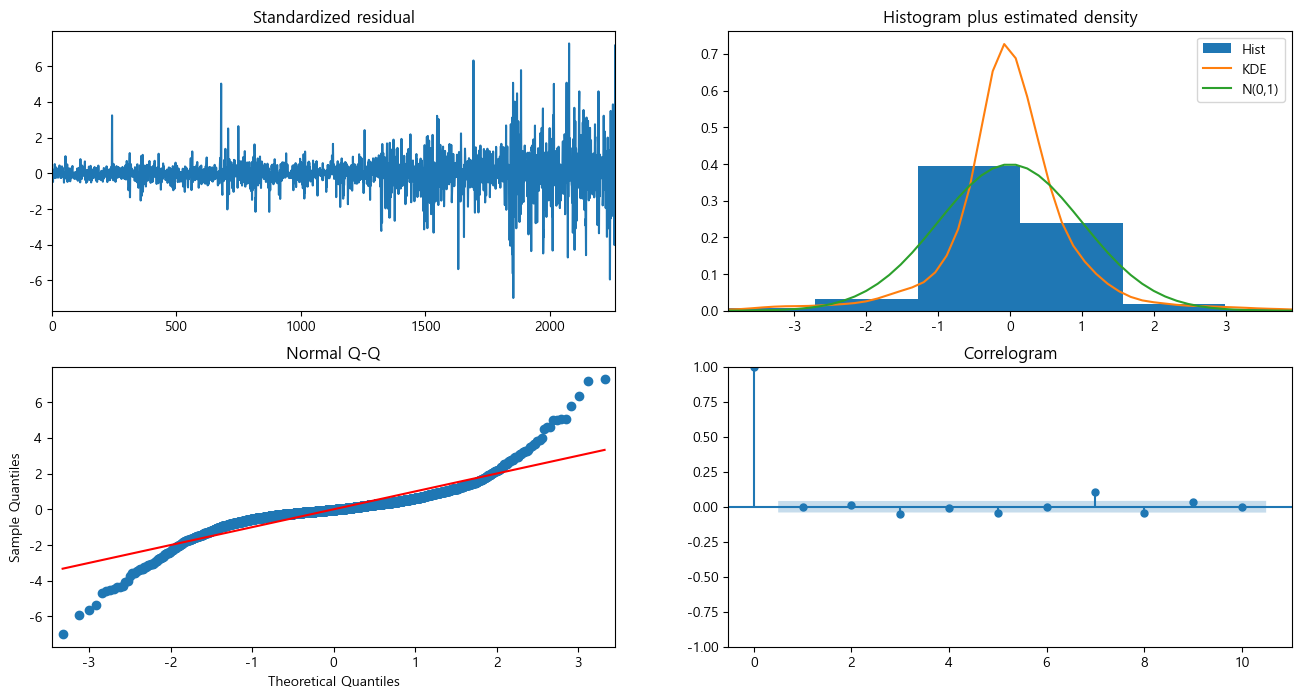

In [36]:
### 계절성 적용 : 검정(평가) 함수 : plot_diagnostics()
best_model_sTrue.plot_diagnostics(figsize=(16, 8))
plt.show()

### 최종 훈련 모델 선정하기

- 훈련 모델 선정 결과
    - 계절성을 적용한 모델과 미적용한 모델의 성능 평가 결과
    - AIC, BIC, HQIC 지표 모두 계절성을 적용한 경우에 가장 좋은 결과를 얻었음
 - 따라서 계절성을 적용한 최적의 모델을 선정하여 예측에 활용하는 것이 타당함
 - 즉, 계절성을 가지는 모델이 미적용 모델보다 
       자기상관 및 정규분포성에서 다소 좋은 모델로 여겨짐

### 테스트 데이터로 예측하기

- 시계열에서는 예측이라는 용어를 "forecast"라고 칭하기도 함
- 예측 함수 : predict()
- 예측 결과 : 예측데이터, 상한가(상한 바운드), 하한가(하한 바운드)
- 예측결과를 시각화하여 확인
- 예측 방법
    * forecast 예측함수 생성 후 predict 수행
   
- 함수를 사용하는 이유
    - 시간단위의 시계열 예측의 경우
        - 예측에 사용할 시간단위 데이터 별로 각각 예측을 수행해서 결과값을 리스트에 담아야 함
        - 과값을 담은 리스트에 전체 예측 결과가 담김

    - 예측에 사용할 각각의 시간단위 데이터 -> 반복해서 예측을 수행해야 하기 때문 -> 반복문을 적용해야 함 

In [37]:
### 예측 함수 생성하기

import numpy as np

# - model : best model
# - n : 예측하려는 향후 기간(디폴트로 1을 지정, 1일을 의미함)
def forecast_n_step(model, n=1) :
    ### 예측하기
    # - n_periods : 예측기간 (일단위)
    # - return_conf_int : 신뢰구간(상한가/하한가) 반환여부
    # - fc : 예측 결과
    # - conf_int : 예측된 신뢰구간값(상한가/하한가)
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print(fc, conf_int)
    return (
        fc.tolist()[0:n],
        np.asarray(conf_int).tolist()[0:n]
    )


In [ ]:
### 예측을 위한 실행 함수 생성하기 (데이터 여부에 따른 반복 수행)
# - 최종 예측 결과를 반환(return)할 때 시리즈타입으로 반환하기 위해 판다스 적용
import pandas as pd

def forecast(len, model, index, data=None) :
    ### 예측 결과값을 담을 리스트 변수 정의
    # - 예측 결과
    y_pred = []
    # - 상한가
    pred_upper = []
    # - 하한가
    pred_lower = []
   
    ### 데이터(data) 값이 있는 경우
    # - 훈련모델을 이용해서 테스트 데이터로 예측하고자 할 때
    # - 테스트 데이터의 실제값과 예측값을 시각화하여 비교하고자 할 때
    if data is not None :
        ### 각 시간단위 데이터 별로 반복 수행하기
        for new_data in data :
            ### 각 데이터로 예측하기 : 예측 함수 정의 및 호출하여 사용
            # - fc : 예측결과(y_pred에 넣을 값)
            # - conf : 신뢰구간 (상한가 및 하한가 값)
            fc, conf = forecast_n_step(model)
            ### 반환값의 형태
            #   : [146.4129300335647] [[144.6020755382728, 148.22378452885658]]
            # print(fc, conf)
           
            ### 예측 결과를 리스트 변수에 담기
            # - 예측결과
            y_pred.append(fc[0])
           
            # - 상한가
            pred_upper.append(conf[0][1])
           
            # - 하한가
            pred_lower.append(conf[0][0])
           
            ### 각 데이터별로 예측 후에 model을 해당 데이터로 업데이트
            # - 시계열에서는 데이터별로 model을 갱신하면서 반복 수행
            model.update(new_data)          
           
   
    ### 데이터(data) 값이 없는 경우
    # - 향후를 예측할 때 사용(현재 일 이후 향후 데이터는 없는 상태가 됨)
    # - 이때 아래 else 영역을 이용하게 됨
    else :
        ### 받아온 매개변수 len의 갯수를 이용해서 반복 수행하기
        for i in range(len) :
            ### 각 데이터로 예측하기 : 예측 함수 정의 및 호출하여 사용
            # - fc : 예측결과(y_pred에 넣을 값)
            # - conf : 신뢰구간 (상한가 및 하한가 값)
            fc, conf = forecast_n_step(model)
            ### 반환값의 형태
            #   : [146.4129300335647] [[144.6020755382728, 148.22378452885658]]
            # print(fc, conf)
           
            ### 예측 결과를 리스트 변수에 담기
            # - 예측결과
            y_pred.append(fc[0])
           
            # - 상한가
            pred_upper.append(conf[0][1])
           
            # - 하한가
            pred_lower.append(conf[0][0])
           
            ### 각 데이터별로 예측 후에 model을 해당 데이터로 업데이트
            # - 시계열에서는 데이터별로 model을 갱신하면서 반복 수행
            model.update(fc[0])

    ### 반환하기
    # - 예측결과는 -> 시리즈 타입으로 반환하기
    # - 튜플로 (예측결과[시리즈타입], 상한가, 하한가)
    return pd.Series(y_pred, index), pred_upper, pred_lower

In [39]:
### 함수 호출 영역
# - fc : 예측결과
# - upper : 상한가
# - lower : 하한가

# - 실제 사용하는 값 : best_model_sTrue, index, data
# - len값은 별도로 사용(data가 없을 때 사용 예정)
fc, upper, lower = forecast(len(test_data), best_model_sTrue,
                             test_data.index, data=test_data)

fc, upper, lower

c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Administrator\anaconda3\envs\pk_dl_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(Date
 2021-10-29    145.713676
 2021-11-01    147.834609
 2021-11-02    143.606644
 2021-11-03    144.756621
 2021-11-04    145.076134
                  ...    
 2022-10-24    100.779017
 2022-10-25    102.544742
 2022-10-26    104.576096
 2022-10-27     95.207390
 2022-10-28     92.800019
 Length: 252, dtype: float64,
 [147.51602023243643,
  149.63780330060376,
  145.42136067921408,
  146.5712330563851,
  146.89067102233756,
  149.23989595829727,
  150.01923195779491,
  151.0053888246172,
  150.2851541994382,
  148.14698313483015,
  147.6813477139054,
  150.68699466773052,
  150.23902058079858,
  149.6224659957686,
  149.86752924142962,
  151.48058273565567,
  151.49976934086254,
  148.2431361494,
  148.0701085391449,
  147.63739158196842,
  144.28045191061995,
  146.7345643494296,
  143.58720571585133,
  142.6168364957478,
  144.6155424350083,
  144.14976685891895,
  144.68810937661544,
  149.06742011369326,
  149.35924253989688,
  149.31000203579828,
  149.36835139746333,
  147.761

### 시각화 하기

In [40]:
### 실제 테스트 데이터와 예측 데이터 비교를 위한 시각화
# - 상한가와 하한가를 포함하여 시각화
# - 상한가와 하한가도 시각화를 위해 시리즈 타입으로 변환
# - 상한가 및 하한가의 시리즈 index는 test_data의 index값 사용

# 하한가
lower_series = pd.Series(lower, index=test_data.index)

# 상한가
upper_series = pd.Series(upper, index=test_data.index)

print(lower_series.shape, upper_series.shape)
lower_series, upper_series

(252,) (252,)


(Date
 2021-10-29    143.911332
 2021-11-01    146.031415
 2021-11-02    141.791927
 2021-11-03    142.942010
 2021-11-04    143.261597
                  ...    
 2022-10-24     98.426632
 2022-10-25    100.192075
 2022-10-26    102.222837
 2022-10-27     92.822407
 2022-10-28     90.410640
 Length: 252, dtype: float64,
 Date
 2021-10-29    147.516020
 2021-11-01    149.637803
 2021-11-02    145.421361
 2021-11-03    146.571233
 2021-11-04    146.890671
                  ...    
 2022-10-24    103.131403
 2022-10-25    104.897409
 2022-10-26    106.929355
 2022-10-27     97.592372
 2022-10-28     95.189397
 Length: 252, dtype: float64)

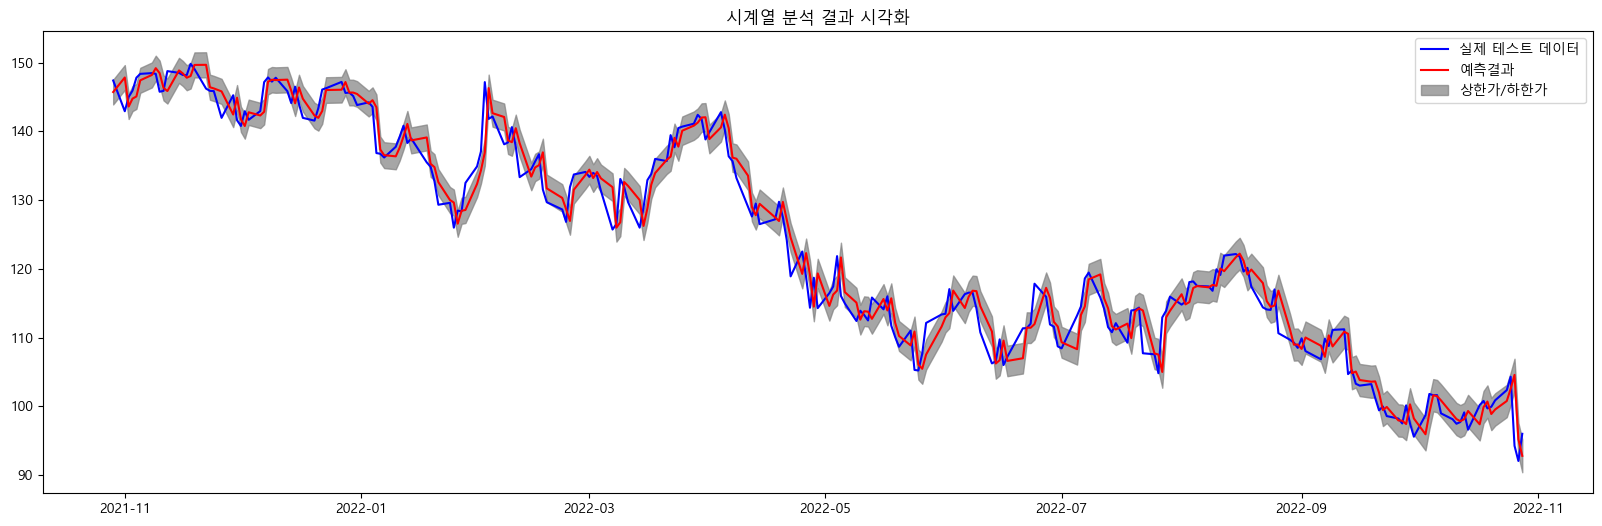

In [44]:
### 실제 테스트 데이터와 예측 데이터 추이 비교 시각화
plt.figure(figsize=(20, 6))
plt.title("시계열 분석 결과 시각화")

### 훈련 데이터
# plt.plot(train_data, label="훈련 데이터", c="green")

### 실제 테스트 데이터
plt.plot(test_data, label="실제 테스트 데이터", c="blue")

### 예측 데이터
plt.plot(fc, label="예측결과", c="red")

### 상한가 / 하한가 그리기
# - fill_between() 함수 이용 : 위/아래(상한가/하한가) 영역을 음영으로 표시하여 시각화 하는 함수
# - alpha : 투명도(값이 클수록 짙어짐, 0~1 사이의 값 사용)
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=0.7, label="상한가/하한가", color="gray")

plt.legend()
plt.show()

### 회귀모델 성능평가

In [45]:
### 시계열 분석은 선형 분석과 동일하기에 회귀모델의 성능 평가지표를 사용할 수 있음

### 평가 라이브러리 정의
# 평균절대오차(MAE)
from sklearn.metrics import mean_absolute_error
# 평균제곱오차(MSE)
from sklearn.metrics import mean_squared_error
# 결정계수(R2-score)
from sklearn.metrics import r2_score


# MAE
mae = mean_absolute_error(test_data, fc)

# MSE
mse = mean_squared_error(test_data, fc)

# R2
r2 = r2_score(test_data, fc)

mae, mse, r2

### 결정력 0.97로 수정종가를 이용하여 예측을 위한 모델로 활용 가능하고 매우 훌륭한 모델로 판단됨

(2.0954195918727705, 7.39331245466729, 0.9710588460787782)